In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Алгоритм K-means

In [2]:
def kmeans (points, k):
    num = points.shape[0]
    centers = []
    for i in range(k):
        centers.append(z[np.random.randint(z.shape[0]), :]) 
    centers = np.array(centers)
    result = -1*np.ones(num)
    prev_result = np.zeros(num)
    result = -1*np.ones(num)
    prev_result = np.zeros(num)
    while result.all() != prev_result.all():
        prev_result = result
        for i in range(num):
            minimum = 1000
            nearest_center = -1;
            for j in range(k):
                distance = (np.sqrt((points[i][0] - centers[j][0])**2 + (points[i][1] - centers[j][1])**2))**2
                if (minimum > distance):
                    minimum = distance
                    nearest_center = j
            result[i] = nearest_center
        sum_x = {i:0 for i in range(k)}
        sum_y = {i:0 for i in range(k)}
        number_points = {i:0 for i in range(k)}
        for i in range(num):
            sum_x[result[i]] += points[i][0]
            sum_y[result[i]] += points[i][1]
            number_points[result[i]] += 1
        for i in range(k):
            if (number_points[i] == 0):
                centers[i] = centers[i]
            else:
                centers[i] = (sum_x[i] / number_points[i], sum_y[i] / number_points[i])
    return result, centers

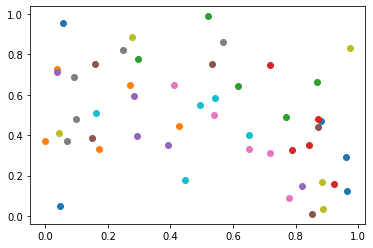

In [3]:
z = np.random.random((50, 2)) #датасет - рандомные точки

for i in range (z.shape[0]):
    plt.scatter(*z[i]) # начальная расстановка

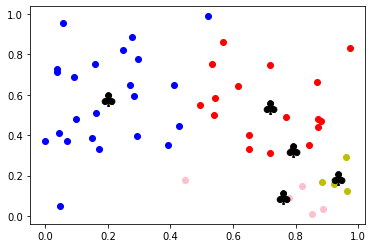

In [4]:
result, centers = kmeans(z, 5) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"}
centers

for i in range (z.shape[0]):
        plt.scatter(*z[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [5]:
# работает)

# 1. Исследование работы алгоритма от начальной инициализации

In [6]:
# алгоритм выше инициализирует начальные центры случайно,
# попробуем инициализировать первcый центр - первой точкой,
# второй центр - максимально удаленный от первого и т д

In [7]:
def findcenters(points, k): 
    centers = [] 
    centers.append(points[np.random.randint(points.shape[0]), :]) 
    centers = np.array(centers)
    for i in range(k - 1): 
        distance = [] 
        for j in range(points.shape[0]):
            point = points[j, :]
            for p in range(centers.shape[0]): 
                dist = np.sum((point - centers[p])**2)
            distance.append(dist) 
        distance = np.array(distance)
        centers = list(centers)
        centers.append(points[np.argmax(distance), :]) 
        centers = np.array(centers)
        distance = [] 
    return centers

In [8]:
centers = findcenters(z, 5)

In [9]:
def kplusplus (points, k, centers):
    num = points.shape[0]
    result = -1*np.ones(num)
    prev_result = np.zeros(num)
    while result.all() != prev_result.all():
        prev_result = result
        for i in range(num):
            minimum = 1000
            nearest_center = -1;
            for j in range(k):
                distance = (np.sqrt((points[i][0] - centers[j][0])**2 + (points[i][1] - centers[j][1])**2))**2
                if (minimum > distance):
                    minimum = distance
                    nearest_center = j
            result[i] = nearest_center
        sum_x = {i:0 for i in range(k)}
        sum_y = {i:0 for i in range(k)}
        number_points = {i:0 for i in range(k)}
        for i in range(num):
            sum_x[result[i]] += points[i][0]
            sum_y[result[i]] += points[i][1]
            number_points[result[i]] += 1
        for i in range(k):
            if (number_points[i] == 0):
                centers[i] = centers[i]
            else:
                centers[i] = (sum_x[i] / number_points[i], sum_y[i] / number_points[i])
    return result, centers

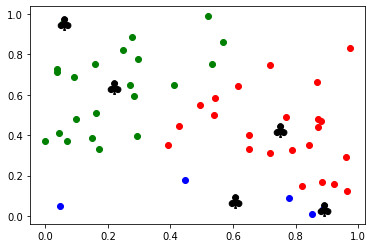

In [10]:
result, centers = kplusplus(z, 5, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (z.shape[0]):
        plt.scatter(*z[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [11]:
# разница заметна невооруженным глазом, эта стратегия инициализации центров работает лучше, чем случайная

# 2. Исследование области применения

In [12]:
# рассмотрим работу алгоритма на разных датасетах

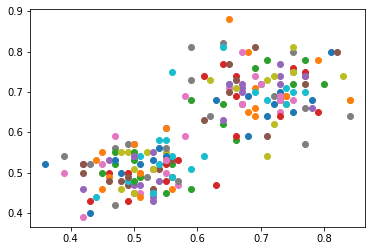

In [13]:
a = np.round( np.random.normal(0.5, 0.05, 200), 2)
a = a.reshape(100,2)
b = np.round( np.random.normal(0.7, 0.06, 200), 2)
b = b.reshape(100,2)
c = np.row_stack((a, b))
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

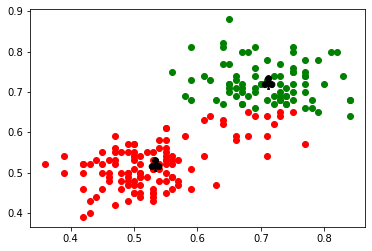

In [14]:
centers = findcenters(c, 2)
result, centers = kplusplus(c, 2, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

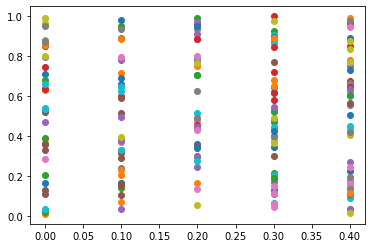

In [15]:
a = np.random.random(200)
b = np.ones(200)*np.random.choice(5, 200) * 0.1
c = np.stack((b, a))
c = c.transpose()
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

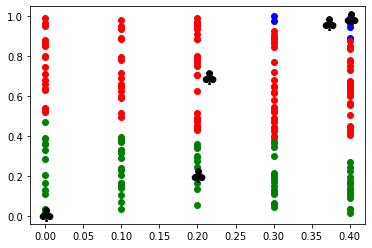

In [16]:
centers = findcenters(c, 5)
result, centers = kplusplus(c, 5, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

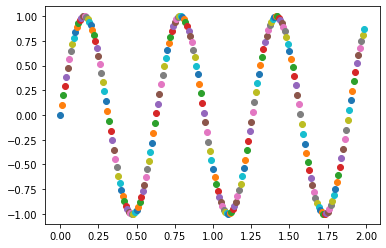

In [17]:
a = np.arange(200)* 0.1
b = np.sin(a)
a = a*0.1
c = np.stack((a, b))
c = c.transpose()
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

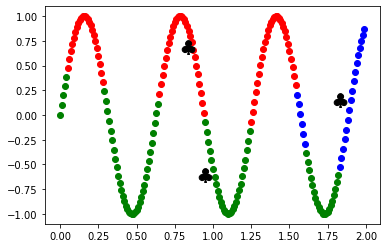

In [18]:
centers = findcenters(c, 3)
result, centers = kplusplus(c, 3, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

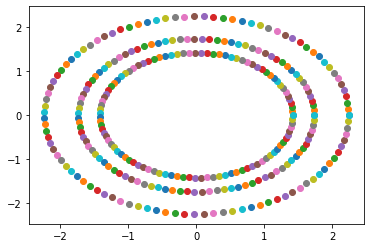

In [19]:
a = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(2.0)
x = r*np.cos(a)
y = r*np.sin(a)
c = np.stack((x, y))
c = c.transpose()

a1 = np.linspace(0, 2*np.pi, 100)
r1 = np.sqrt(3)
x1 = r1*np.cos(a1)
y1 = r1*np.sin(a1)
c1 = np.stack((x1, y1))
c1 = c1.transpose()
c = np.row_stack((c1, c))

a1 = np.linspace(0, 2*np.pi, 100)
r1 = np.sqrt(5)
x1 = r1*np.cos(a1)
y1 = r1*np.sin(a1)
c1 = np.stack((x1, y1))
c1 = c1.transpose()
c = np.row_stack((c1, c))

for i in range (c.shape[0]):
        plt.scatter(*c[i],)

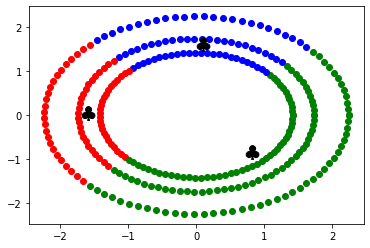

In [20]:
centers = findcenters(c, 3)
result, centers = kplusplus(c, 3, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [21]:
# Можно сделать вывод о том, что алгоритм подходит для кластеризации
# данных в виде "облаков"

# 3. Стратегия выбора количества центроидов

In [22]:
# для выбора количества кластеров будем использовать <<метод локтя>>
# в цикле будем считать сумму квадратов расстояний от точек до их
# центроидов

In [23]:
def inertia(points, k, centers, result):
    for i in range(points.shape[0]):
        x = int(result[i])
        distan = (np.sqrt((points[i][0] - centers[x][0])**2 + (points[i][1] - centers[x][1])**2))**2
        summ = 0
        summ += distan
    return summ

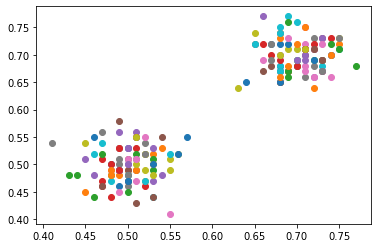

In [24]:
a = np.round( np.random.normal(0.5, 0.03, 200), 2)
a = a.reshape(100,2)
b = np.round( np.random.normal(0.7, 0.03, 200), 2)
b = b.reshape(100,2)
c = np.row_stack((a, b))
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

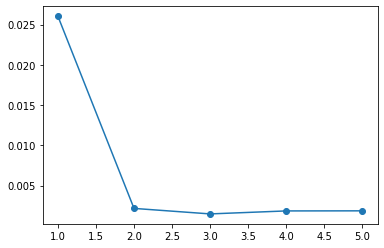

In [25]:
dis = []
for i in range (1, 6):
    centers = findcenters(c, i)
    result, centers = kplusplus(c, i, centers)
    inertia(c, i, centers, result)
    dis.append([i, inertia(c,i,centers,result)])
dis = np.array(dis)
dis = dis.transpose()
plt.plot( dis[0], dis[1], marker = 'o')

In [26]:
# по графику видно, что излом достигается при к = 2
# то есть это оптимальное количество кластеров для 
# данной конфигурации. Попробуем на другом датасете

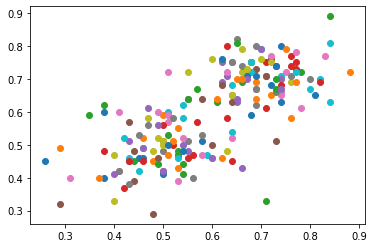

In [27]:
a = np.round( np.random.normal(0.5, 0.08, 200), 2)
a = a.reshape(100,2)
b = np.round( np.random.normal(0.7, 0.06, 200), 2)
b = b.reshape(100,2)
c = np.row_stack((a, b))
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

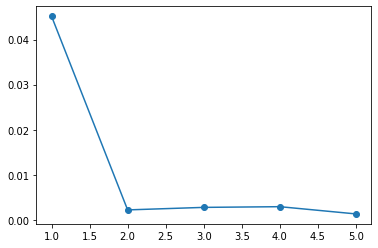

In [28]:
dis = []
for i in range (1, 6):
    centers = findcenters(c, i)
    result, centers = kplusplus(c, i, centers)
    inertia(c, i, centers, result)
    dis.append([i, inertia(c,i,centers,result)])
dis = np.array(dis)
dis = dis.transpose()
plt.plot( dis[0], dis[1], marker = 'o')

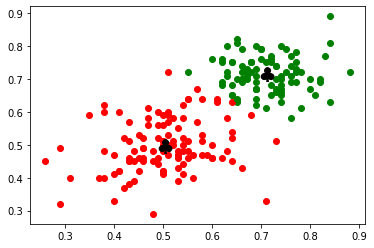

In [29]:
centers = findcenters(c, 2)
result, centers = kplusplus(c, 2, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

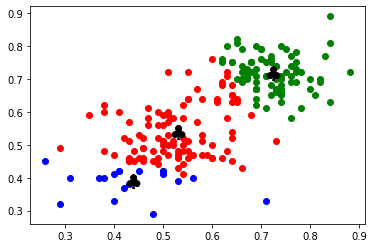

In [30]:
centers = findcenters(c, 3)
result, centers = kplusplus(c, 3, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

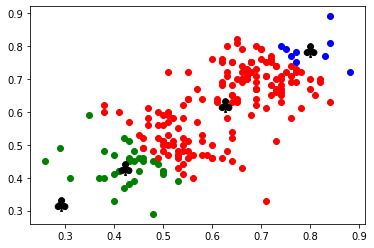

In [31]:
centers = findcenters(c, 4)
result, centers = kplusplus(c, 4, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [32]:
# здесь уже не так однозначно определяется количество центроидов
# при к = 2, 3, 4 кластеризация выглядит логично, поэтому 
# следует выбирать количество кластеров исходя из ситуации

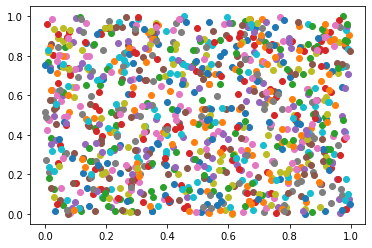

In [61]:
k = np.random.random(2000)
k = k.reshape(1000,2)
for i in range (k.shape[0]):
        plt.scatter(*k[i],)

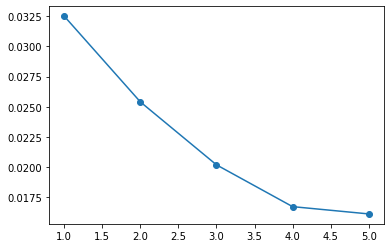

In [65]:
dis = []
for i in range (1, 6):
    centers = findcenters(c, i)
    result, centers = kplusplus(c, i, centers)
    inertia(c, i, centers, result)
    dis.append([i, inertia(c,i,centers,result)])
dis = np.array(dis)
dis = dis.transpose()
plt.plot( dis[0], dis[1], marker = 'o')

In [35]:
# а здесь вообще нет оптимального к

# 4 Исследование времени работы от объема данных

In [36]:
# если верить википедии, то временна сложность алгоритма
# n d-мерных векторов на k кластеров за i итераций:
# O(ikdn)

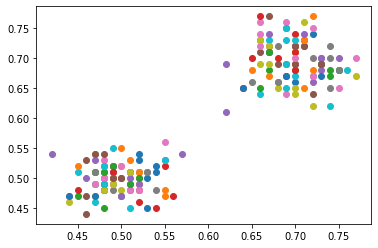

In [37]:
a = np.round( np.random.normal(0.5, 0.03, 200), 2)
a = a.reshape(100,2)
b = np.round( np.random.normal(0.7, 0.03, 200), 2)
b = b.reshape(100,2)
c = np.row_stack((a, b))
for i in range (c.shape[0]):
        plt.scatter(*c[i],) # 200 точек

Wall time: 380 ms


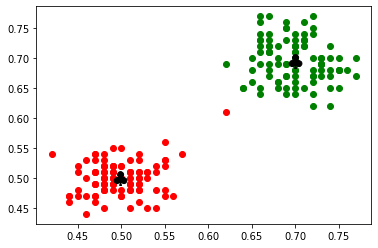

In [38]:
%%time
centers = findcenters(c, 2)
result, centers = kplusplus(c, 2, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [39]:
a = np.round( np.random.normal(0.5, 0.03, 400), 2)
a = a.reshape(200,2)
b = np.round( np.random.normal(0.7, 0.03, 400), 2)
b = b.reshape(200,2)
c = np.row_stack((a, b)) # 400 точек

Wall time: 887 ms


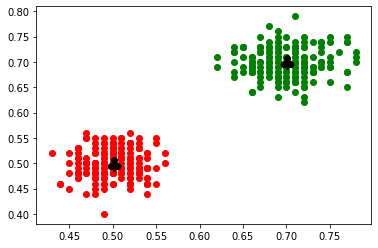

In [40]:
%%time
centers = findcenters(c, 2)
result, centers = kplusplus(c, 2, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

In [41]:
a = np.round( np.random.normal(0.5, 0.03, 800), 2)
a = a.reshape(400,2)
b = np.round( np.random.normal(0.7, 0.03, 800), 2)
b = b.reshape(400,2)
c = np.row_stack((a, b)) # 800 точек

Wall time: 2.45 s


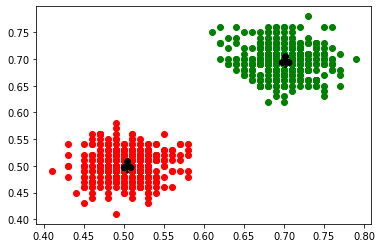

In [42]:
%%time
centers = findcenters(c, 2)
result, centers = kplusplus(c, 2, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220)

Wall time: 2.46 s


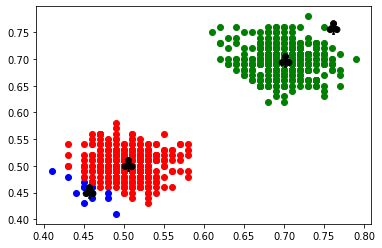

In [43]:
%%time
centers = findcenters(c, 4)
result, centers = kplusplus(c, 4, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220) # 800 точек но 4 кластера

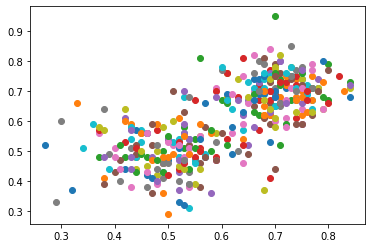

In [44]:
a = np.round( np.random.normal(0.5, 0.08, 400), 2)
a = a.reshape(200,2)
b = np.round( np.random.normal(0.7, 0.06, 400), 2)
b = b.reshape(200,2)
c = np.row_stack((a, b))
for i in range (c.shape[0]):
        plt.scatter(*c[i],)

Wall time: 882 ms


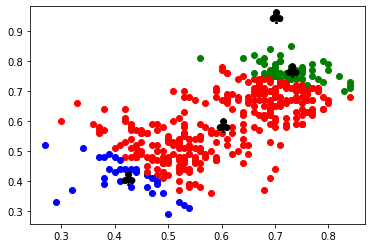

In [45]:
%%time
centers = findcenters(c, 4)
result, centers = kplusplus(c, 4, centers) 
color = {0: "r", 1: "g", 2: "b", 3: "y", 4: "pink", 5: "orange"} 
for i in range (c.shape[0]):
        plt.scatter(*c[i], c = color[result[i]])
for i in range(centers.shape[0]):
    plt.scatter(*centers[i], c = "black", alpha = 1, marker = '$\clubsuit$', s = 220) # другой датасет 4 кластера 400 точек

In [46]:
# исходя из полученных данных можно заключить, что время работы
# алгоритма зависит от количества входных данных
# количества кластеров, и количества итераций схождения центров

# 5. Визуализация матрицы попарных расстояний

In [47]:
# Воспользуемся многомерным шкалированием. Зададим случайные значения векторов
# посчитаем для них функционал, называемый стрессом
# повторим несколько раз и выберем минимальный результат
# взято отсюда http://www.machinelearning.ru/wiki/images/c/ca/Voron-ML-Clustering.pdf
# на конкретном примере

In [48]:
a = [0,6,24,4,40,38,6,0,7,5,30,32,24,7,0,34,27,31,4,5,34,0,23,25,40,30,27,23,0,4,38,32,31,25,4,0]
a = np.array(a)
a = a.reshape(6,6)
a

array([[ 0,  6, 24,  4, 40, 38],
       [ 6,  0,  7,  5, 30, 32],
       [24,  7,  0, 34, 27, 31],
       [ 4,  5, 34,  0, 23, 25],
       [40, 30, 27, 23,  0,  4],
       [38, 32, 31, 25,  4,  0]])

In [49]:
s = np.random.randint(0,40, 12)
s.reshape(6,2)
r = np.random.randint(0,40, 12)
r.reshape(6,2)
minimum = 100000
for k in range (100):
    minsum = 0
    s = np.random.randint(0,40, 12)
    s.reshape(6,2)
    for i in range (a.shape[0]):
        for j in range(a.shape[1]):
            k = (np.float32(a[i][j]))**-2
            if (a[i][j] != 0):
                minsum += (np.sqrt(np.sum((s[i] - s[j])**2)) - a[i][j])**2* k
    if (minimum > minsum):
        minimum = minsum
        r = s
r = r.reshape(6,2)

<ipython-input-49-8712c8600d16>:12: RuntimeWarning: divide by zero encountered in power
  k = (np.float32(a[i][j]))**-2


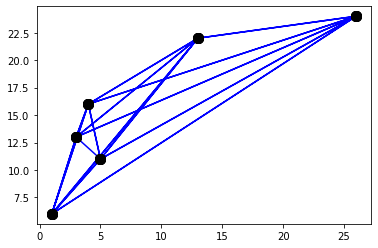

In [50]:
from itertools import combinations, chain
combs = list(combinations(r[0:], 2))
x = list(chain(*[[p1[0],p2[0]] for p1,p2 in combs]))
y = list(chain(*[[p1[1],p2[1]] for p1,p2 in combs]))
plt.plot(x, y, marker='o', markersize = 10, color = 'b', mec = 'black', mfc = 'black')

In [51]:
# для произвольного размера
u = np.triu(np.random.random((10, 10))* 40, k = 1)
l = u.transpose()
u = l+u

In [52]:
s = np.random.randint(0,40, 20)
s.reshape(10,2)
r = np.random.randint(0,40, 20)
r = r.reshape(10, 2)
minimum = 100000
for k in range (100):
    minsum = 0
    s = np.random.randint(0,40, 20)
    s.reshape(10,2)
    for i in range (a.shape[0]):
        for j in range(a.shape[1]):
            k = (np.float32(a[i][j]))**-2
            if (a[i][j] != 0):
                minsum += (np.sqrt(np.sum((s[i] - s[j])**2)) - a[i][j])**2* k
    if (minimum > minsum):
        minimum = minsum
        r = s
r = r.reshape(10,2)

<ipython-input-52-3a034e26b0f4>:12: RuntimeWarning: divide by zero encountered in power
  k = (np.float32(a[i][j]))**-2


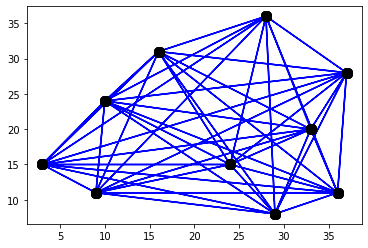

In [53]:
from itertools import combinations, chain
combs = list(combinations(r[0:], 2))
x = list(chain(*[[p1[0],p2[0]] for p1,p2 in combs]))
y = list(chain(*[[p1[1],p2[1]] for p1,p2 in combs]))
plt.plot(x, y, marker='o', markersize = 10, color = 'b', mec = 'black', mfc = 'black')